Certainly! Let's go through the code and provide explanations for the relevant equations and assumptions:

## Static and Dynamic Ground Reaction Force:

**Equation:**
$$ F_v = G + |G \cdot DLF \cdot \sin(2\pi fv t)| $$

**Explanation:**
\($ F_v$ \) represents the total ground reaction force, which includes both static \( $G$ \) and dynamic components. \( $DLF$ \) is the dynamic load factor, and \( $fv$ \) is the frequency associated with the walking velocity. The dynamic component is calculated as a sinusoidal function of time.

## Duhamel Integration Function:

**Equations:**
$$ A_i = \frac{1}{m \omega_d} \sum_{i=1}^{n} \frac{1}{2} \Delta t(y_i + y_{i-1}) $$
$$ B_i = \frac{1}{m \omega_d} \sum_{i=1}^{n} \frac{1}{2} \Delta t(z_i + z_{i-1}) $$
$$ U_i = A_i e^{-\xi \omega_n t_i} \sin(\omega_d t_i) - B_i e^{-\xi \omega_n t_i} \cos(\omega_d t_i) $$

**Explanation:**
These equations represent the Duhamel integration method for solving a single-degree-of-freedom (SDoF) system subjected to dynamic loading. \( A_i \) and \( B_i \) are coefficients, and \( U_i \) is the response at each time step. \( \omega_n \) is the natural frequency, \( \omega_d \) is the damped angular frequency, and \( \xi \) is the damping ratio.

## Dynamic Analysis - Bridge + 1 Pedestrian:

**Equation:**
$$ Fn = F_v \cdot \phi $$

**Explanation:**
\( Fn \) represents the modal force experienced by the SDoF system, and \( \phi \) is the mode shape at the pedestrian's location. It is calculated as the product of the total ground reaction force (\( F_v \)) and the mode shape.

## Separation of Static and Dynamic Components:

**Equations:**
$$ Fn_{\text{static}} = G \cdot \phi $$
$$ Fn_{\text{dynamic}} = |G \cdot DLF \cdot \sin(2\pi fv t)| \cdot \phi $$

**Explanation:**
These equations separate the modal force into static and dynamic components. \( Fn_{\text{static}} \) represents the static part, and \( Fn_{\text{dynamic}} \) represents the dynamic part.

## Duhamel Integration for Modal Response:

**Equation:**
$$ \text{response} = \text{Duhamel}(t, Fn) $$

**Explanation:**
The Duhamel integration is applied to calculate the modal response of the SDoF system over time using the previously defined Duhamel function.

## Varying Bridge Mass:

**Equations:**
$$ k = m \omega_n^2 $$
$$ \text{wn} = \sqrt{\frac{k}{m}} $$
$$ \text{wd} = \text{wn} \sqrt{1 - \xi^2} $$

**Explanation:**
These equations calculate the stiffness (\( k \)), natural frequency (\( \text{wn} \)), and damped angular frequency (\( \text{wd} \)) for different bridge masses. The modal response is then calculated for each case.

## Assumptions:

1. The bridge and pedestrian system is modeled as a single-degree-of-freedom (SDoF) system.
2. The dynamic load factor (\( DLF \)) is determined based on a specific function (\( fv \)) that depends on the walking velocity (\( vp \)).
3. The Duhamel integration method is used for solving the equations of motion, assuming it provides an accurate representation of the dynamic response of the system.
4. The mode shape (\( \phi \)) is assumed to be sinusoidal, as it is calculated using \( \sin(\pi \frac{x_p}{L}) \), where \( x_p \) is the pedestrian position and \( L \) is the span of the bridge deck.

These assumptions help simplify the analysis and make the code computationally feasible for the intended dynamic analysis.


In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [47]:
L = 60 # (m) span of the bridge deck
vp = 1.3 # (m/s) walking velocity
tMax = L/vp # (s) crossing time
m = 80 #(kg) mass of the pedestrian
G = m*9.81 # (N) static weight of pedestrian

fv = 0.35*vp**3 - 1.59*vp**2 + 2.93*vp
DLF = 0.41*(fv - 0.95)

delT = 0.005 # time-step
time = np.arange(0, tMax+delT, delT) #time vector
Fv = G + abs(G * DLF*np.sin(2*math.pi*(fv/2)*time)) #static + dynamic ground reaction force

In [48]:
# Define the Duhamel integration function
def Duhamel(T, F):
    # Initialize an array to store displacement values
    U = np.zeros(len(T))
    
    # Initialize variables for cumulative sums used to calculate A and B
    ACum_i = 0
    BCum_i = 0
    
    # Loop through the time vector to compute the response at each time point
    for i, t in enumerate(T):
        
        if i > 0:
            # Calculate A[i]
            y_i = math.e**(xi * wn * T[i]) * F[i] * math.cos(wd * T[i])  # Value of integrand at current time-step
            y_iml = math.e**(xi * wn * T[i-1]) * F[i-1] * math.cos(wd * T[i-1])  # Value of integrand at previous time-step
            Area_i = 0.5 * delT * (y_i + y_iml)  # Area of the trapezoid
            ACum_i += Area_i  # Cumulative areas from t=0 to the current time
            A_i = (1 / (m * wd)) * ACum_i  # Value of A for the current time-step
            
            # Calculate B[i]
            y_i = math.e**(xi * wn * T[i]) * F[i] * math.sin(wd * T[i])  # Value of integrand at current time-step
            y_iml = math.e**(xi * wn * T[i-1]) * F[i-1] * math.sin(wd * T[i-1])  # Value of integrand at previous time-step
            Area_i = 0.5 * delT * (y_i + y_iml)  # Area of the trapezoid
            BCum_i += Area_i  # Cumulative areas from t=0 to the current time
            B_i = (1 / (m * wd)) * BCum_i  # Value of B for the current time-step
            
            # Calculate the response
            U[i] = A_i * math.e**(-xi * wn * T[i]) * math.sin(wd * T[i]) - B_i * math.e**(-xi * wn * T[i]) * math.cos(wd * T[i])
            
    return U

## Dynamic Analysis: Bridge + 1 Pedestrian

In [49]:
xp = vp*time #pedestrian position as a function of time
phi = np.sin(math.pi * xp/L) #mode shape at pedestrian's location
Fn = Fv*phi # modal force experienced by SDoF system

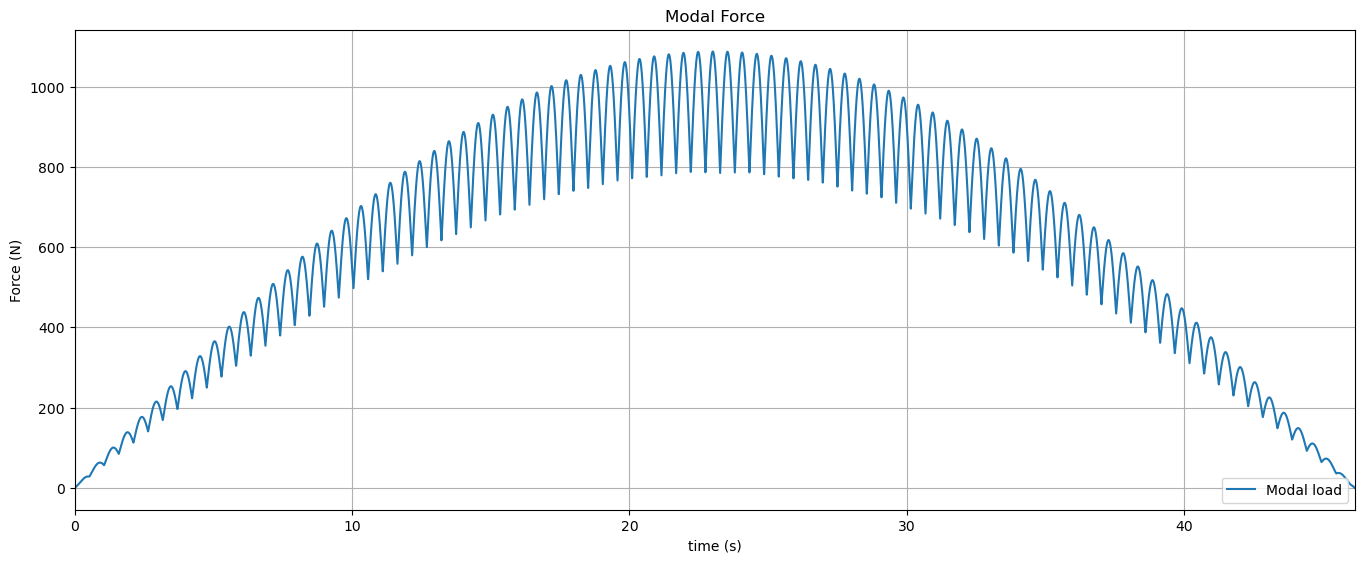

In [50]:
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,2,1])
axes.plot(time, Fn, label='Modal load')

axes.set_xlabel('time (s)')
axes.set_ylabel('Force (N)')
axes.set_title('Modal Force')
axes.legend(loc='lower right')
axes.set_xlim(0, tMax)
plt.grid()
plt.show()

In [51]:
M = 2000 #(kg/m) mass per unit length
m = 0.5*M*L # (kg) modal mass of mode
xi = 0.025 # damping ratio
fn = 2.5 # (Hz) bridge modal frequency
wn = 2*math.pi*2.5 # (rads/s) angular modal frequency
wd = wn*math.sqrt(1-xi**2) # (rads/s) damped angular modal frequency

In [52]:
response = Duhamel(time, Fn) #response calculate using duhamel integral function

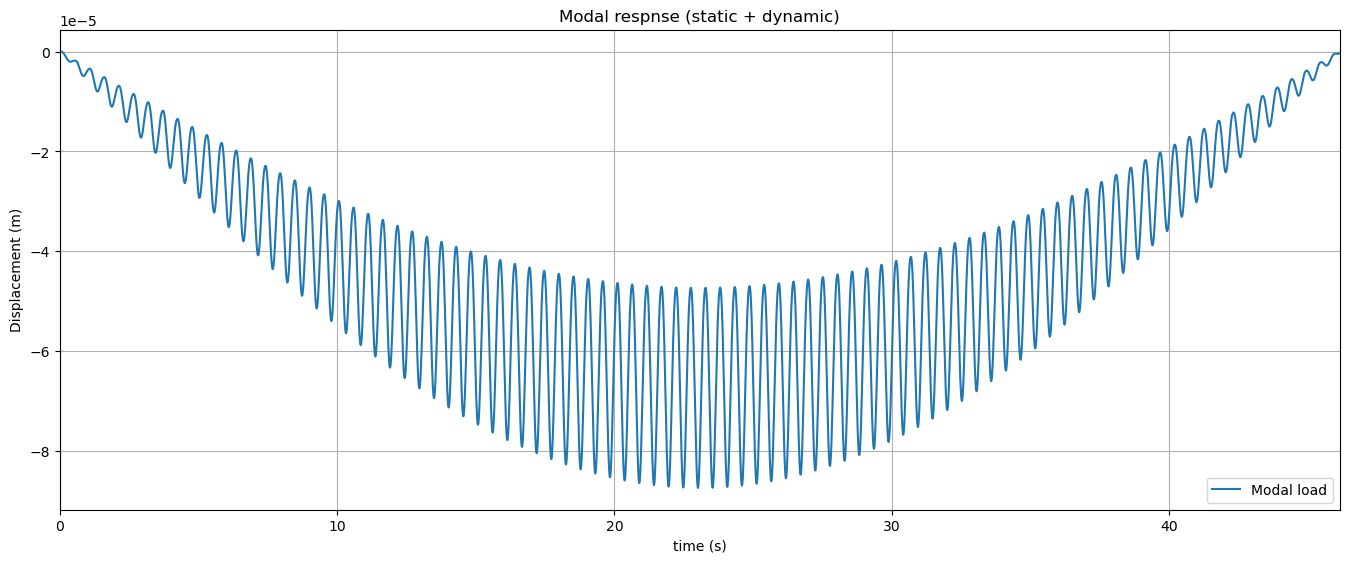

In [53]:
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,2,1])
axes.plot(time, -response, label='Modal load')

axes.set_xlabel('time (s)')
axes.set_ylabel('Displacement (m)')
axes.set_title('Modal respnse (static + dynamic)')
axes.legend(loc='lower right')
axes.set_xlim(0, tMax)
plt.grid()
plt.show()

In [54]:
# to separate the static and dynamic components
Fn_static = G*phi
Fn_dynamic = abs(G*DLF*np.sin(2*math.pi*(fv/2)*time))*phi

response_static = Duhamel(time, Fn_static)
response_dynamic = Duhamel(time, Fn_dynamic)


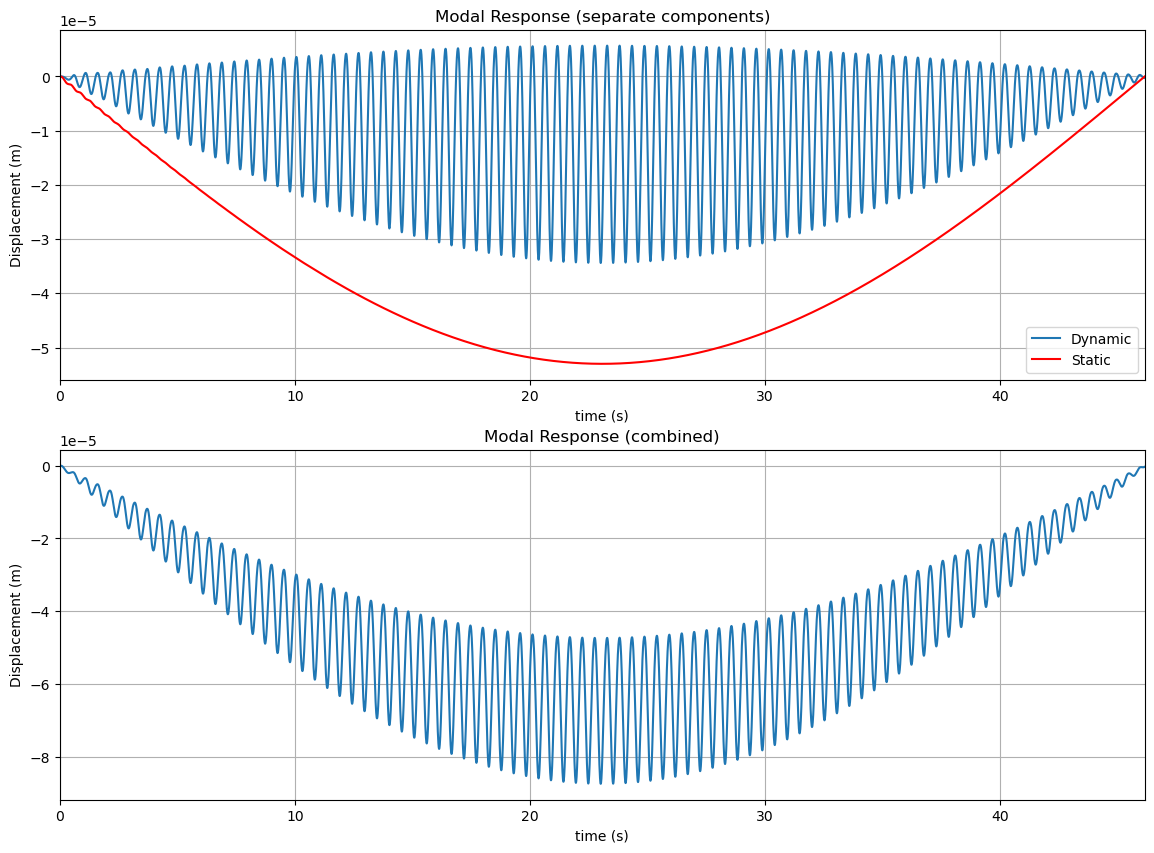

In [55]:
fig, axes =plt.subplots(figsize=(14,10), nrows=2, ncols=1)
axes[0].plot(time, -response_dynamic, label='Dynamic')
axes[0].plot(time, -response_static,'r', label='Static')
axes[0].set_xlabel('time (s)')
axes[0].set_ylabel('Displacement (m)')
axes[0].set_title('Modal Response (separate components)')
axes[0].legend(loc='lower right')
axes[0].set_xlim(0, tMax)
axes[0].grid()

axes[1].plot(time, -response)
axes[1].set_xlabel('time (s)')
axes[1].set_ylabel('Displacement (m)')
axes[1].set_title('Modal Response (combined)')
axes[1].set_xlim(0, tMax)
axes[1].grid()

In [56]:
def Peaks(disp, time):
    # initialize containers to hold peaks and their times
    peaks = np.empty([1, 0])
    times = np.empty([1, 0])
    
    # calculate slopes for each data point
    slopes = np.zeros(len(disp))
    for i, u in enumerate(disp):
        if (i<len(slopes)-1):
            slopes[i] = disp[i+1] - disp[i]
            
    #cycle through the all slopes and pick out the peaks
    for i, u in enumerate(slopes):
        if (i<len(slopes)-1):
            if (slopes[i+1]<0 and slopes[i]>0):
                peaks = np.append(peaks, disp[i])
                times = np.append(times, time[i])
                
    return [peaks, times]

In [57]:
peaks, times = Peaks(response, time)

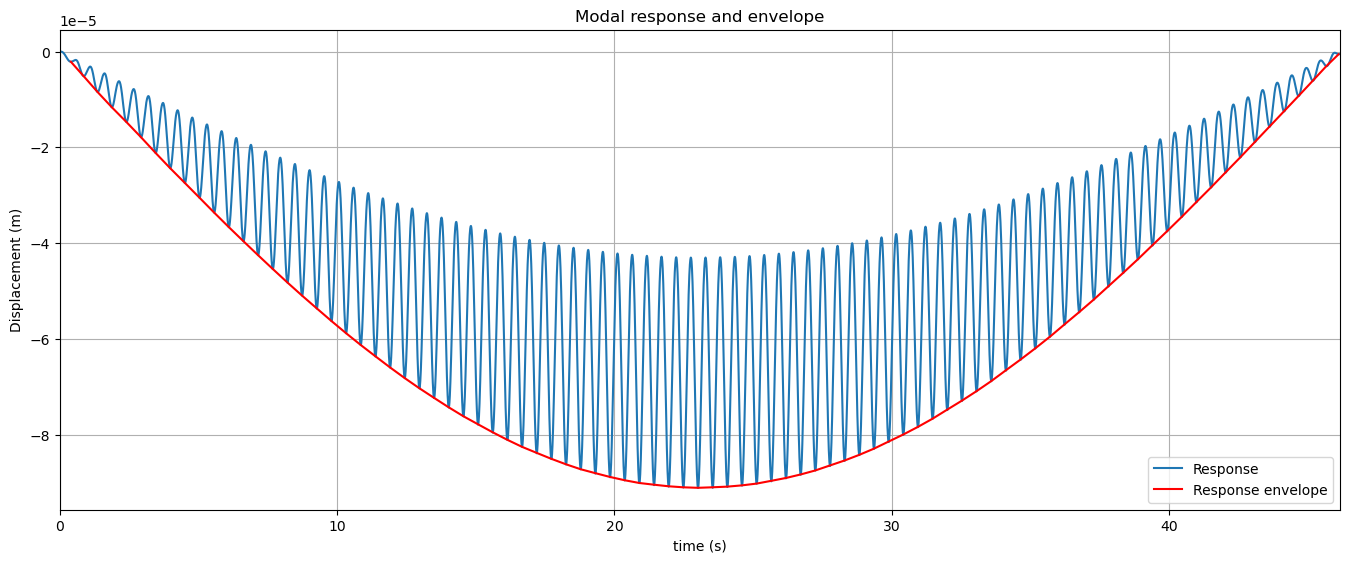

In [62]:
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,2,1])
axes.plot(time, -response, label='Response')
axes.plot(times, -peaks, 'r-', label='Response envelope')

axes.set_xlabel('time (s)')
axes.set_ylabel('Displacement (m)')
axes.set_title('Modal response and envelope')
axes.legend(loc='lower right')
axes.set_xlim(0, tMax)
plt.grid()
plt.show()

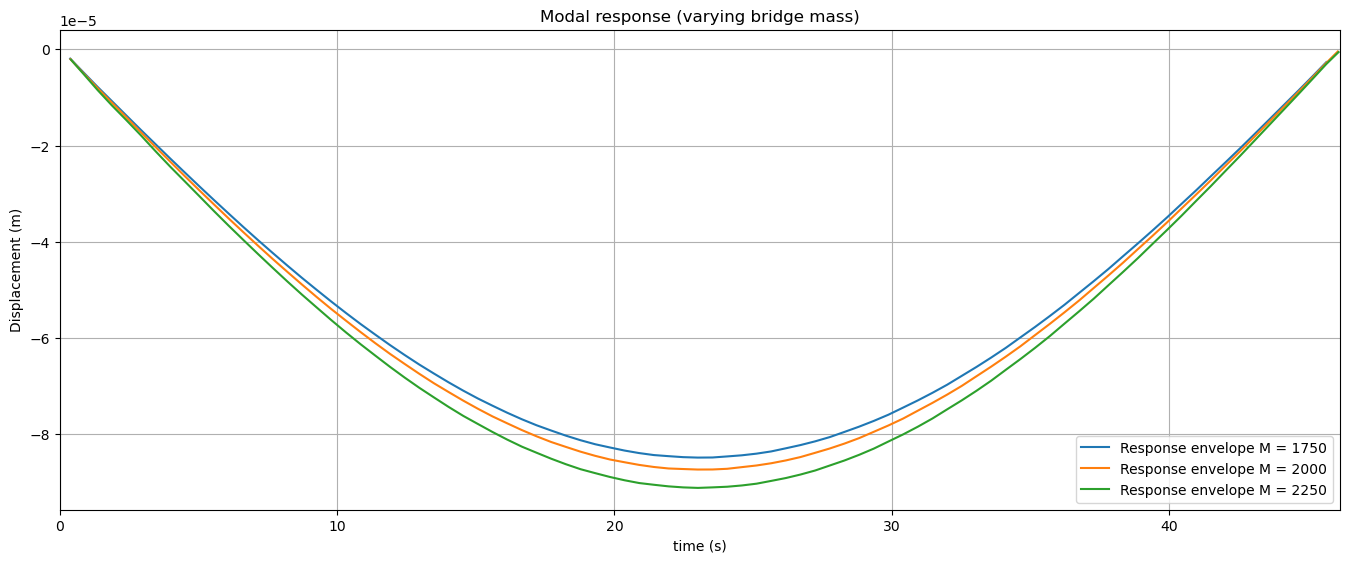

In [61]:
k = m*wn**2
Masses = [1750, 2000, 2250]

fig = plt.figure()
axes = fig.add_axes([0.1,0.1,2,1])

for M in Masses:
    m = 0.5*M*L 
    wn = math.sqrt(k/m)
    wd = wn*math.sqrt(1-xi**2)
    
    response = Duhamel(time, Fn)
    peaks, times = Peaks(response, time)
    
    axes.plot(times, -peaks, label=f'Response envelope M = {M}')
    

axes.set_xlabel('time (s)')
axes.set_ylabel('Displacement (m)')
axes.set_title('Modal response (varying bridge mass)')
axes.legend(loc='lower right')
axes.set_xlim(0, tMax)
plt.grid()
plt.show()